#### ML Modeling

In [1]:
import pandas as pd

# 사용할 모델
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from utils.plt_setting import plt_settings
from utils.evaluation import regression_evaluation, f_importances, plot_actual_pred
from utils.data_manager import read_data

plt_settings()

In [2]:
df_X = read_data('2a-all-scaled-X')
df_y = read_data('2a-all-y')

In [3]:
training_columns = df_X.columns

X_train, X_test, y_train, y_test = \
    train_test_split(df_X, df_y, test_size=0.2)
    
X_test_copy = X_test.copy()

In [4]:
SEED = 123
ml_models = {
    'LIN': LinearRegression(),
    'LASSO': Lasso(),
    'RIDGE': Ridge(),
    'KNR': KNeighborsRegressor(),
    'DTR': DecisionTreeRegressor(),
    'RFR': RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=SEED),
    'GBR': GradientBoostingRegressor(),
    'EN': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=SEED),
    'XGR': XGBRegressor(eta=0.01, n_estimators=100, n_jobs=-1),
}

In [5]:
def diff_ytest_pred(model_key, test, pred):
    test = test['total_cons_cost'].values.tolist()
    pred = pred.tolist()
    if isinstance(pred[0], list):
        pred = [item for sub in pred for item in sub]
    max_test = max(test)
    loop_size = len(test)
    result_mape = []
    result_max_mape = []
    for idx in range(loop_size):
        new_mape = abs((test[idx] - pred[idx])/test[idx])*100
        new_max_mape = abs((test[idx] - pred[idx])/(test[idx]+max_test))*100
        result_mape.append(new_mape)
        result_max_mape.append(new_max_mape)
    X_test_copy[f'{model_key}_mape'] = result_mape
    X_test_copy[f'{model_key}_max_mape'] = result_max_mape

In [6]:
def model_fit_and_evaluation(model_key, display_start=0, display_size=50):
    model = ml_models[model_key]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f'Evaluation: {model_key}')
    evaluation_value = regression_evaluation(y_test, predictions)
    evaluation_values.append(evaluation_value)
    model_names.append(model_key)
    diff_ytest_pred(model_key, y_test, predictions)
    try:
        f_importances(model, training_columns, model_key)
    except AttributeError as e:
        print(f'`{model_key}` object has no attribute `feature_importances_`')
    plot_actual_pred(
        y_test[display_start:display_start+display_size],
        predictions[display_start:display_start+display_size],
        model_key
    )

Evaluation: LIN
R2_SCORE: -8705778749803949056.000000, MAPE: 3482462453.631583, MSE: 81044678484302663118800363192320.000000, RMSE: 9002481795832895.000000, MAE: 255183856614489.875000
`LIN` object has no attribute `feature_importances_`


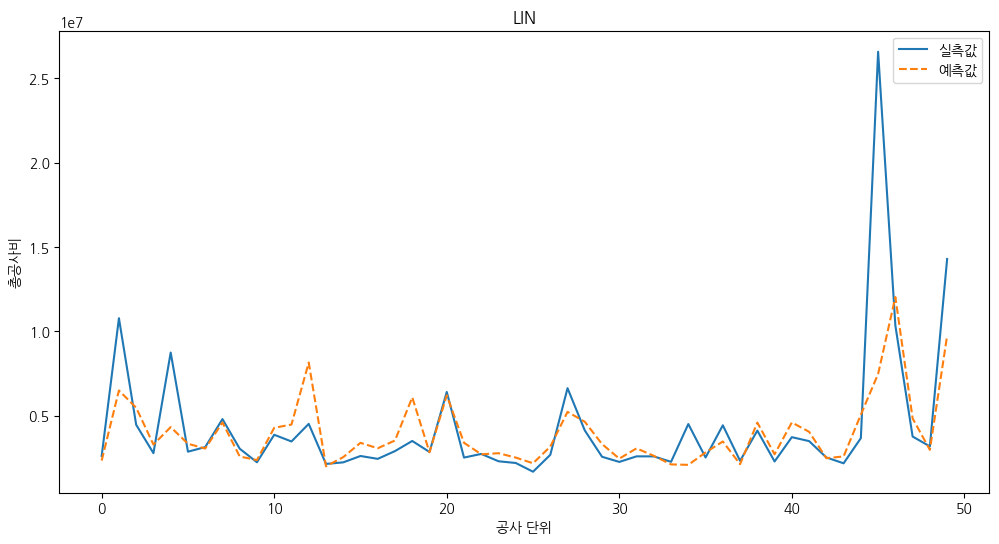

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.289e+16, tolerance: 8.638e+12
  model = cd_fast.enet_coordinate_descent(


Evaluation: LASSO
R2_SCORE: 0.624792, MAPE: 17.708490, MSE: 3492927078827.310059, RMSE: 1868937.419719, MAE: 852020.426220
`LASSO` object has no attribute `feature_importances_`


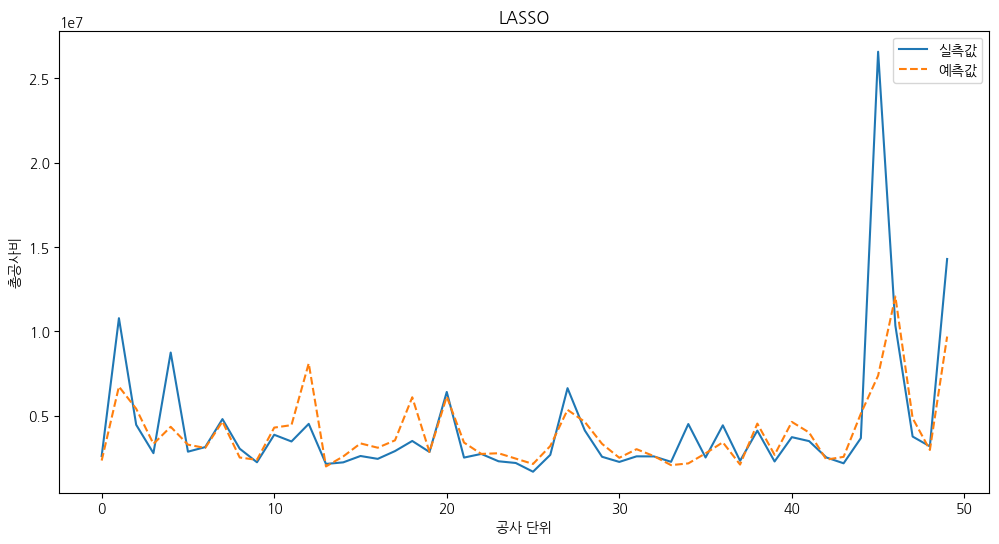

Evaluation: RIDGE
R2_SCORE: 0.626593, MAPE: 17.640581, MSE: 3476152455266.338867, RMSE: 1864444.275184, MAE: 849747.929596
`RIDGE` object has no attribute `feature_importances_`


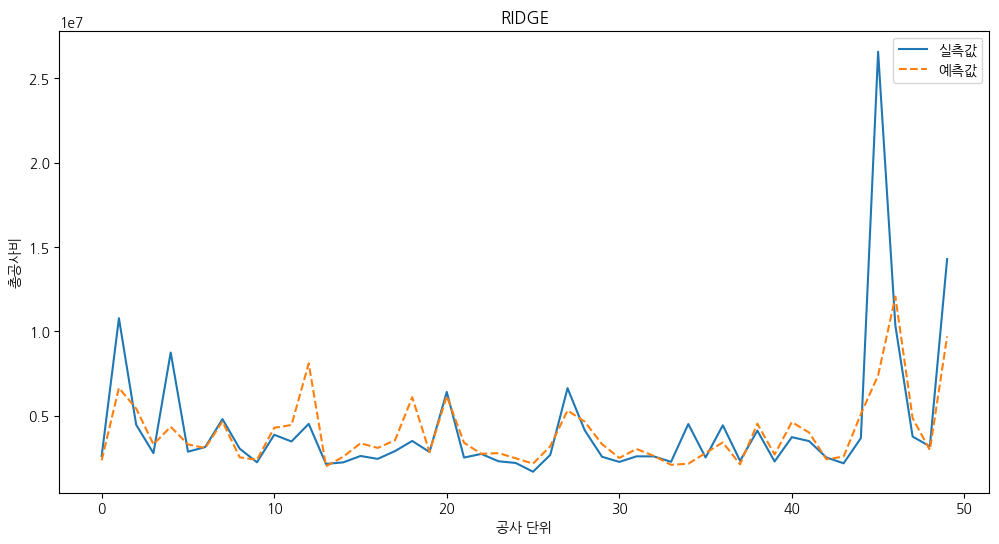

Evaluation: KNR
R2_SCORE: 0.550112, MAPE: 18.502402, MSE: 4188144514001.782227, RMSE: 2046495.666744, MAE: 933289.692051
`KNR` object has no attribute `feature_importances_`


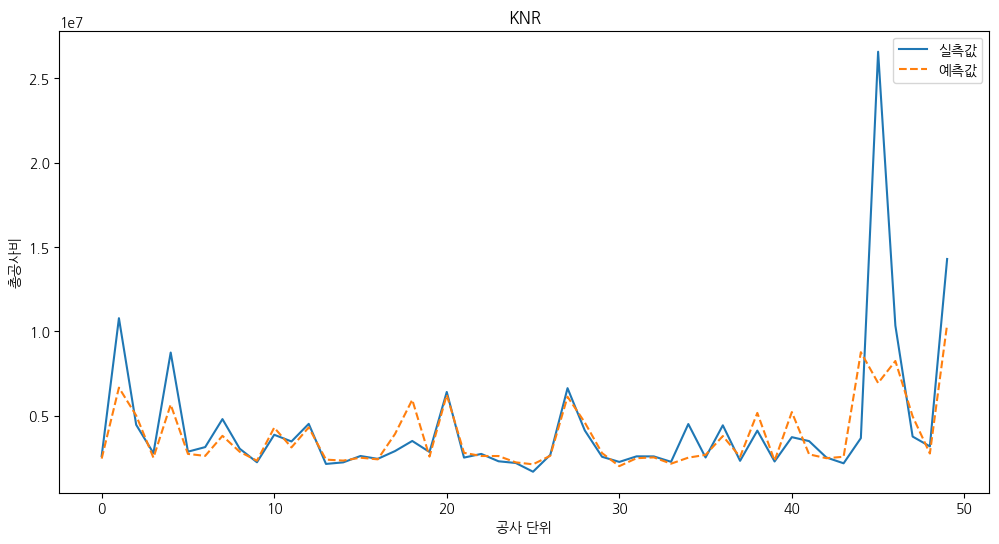

Evaluation: DTR
R2_SCORE: 0.247518, MAPE: 23.712294, MSE: 7005078165440.101562, RMSE: 2646710.820139, MAE: 1165079.715415


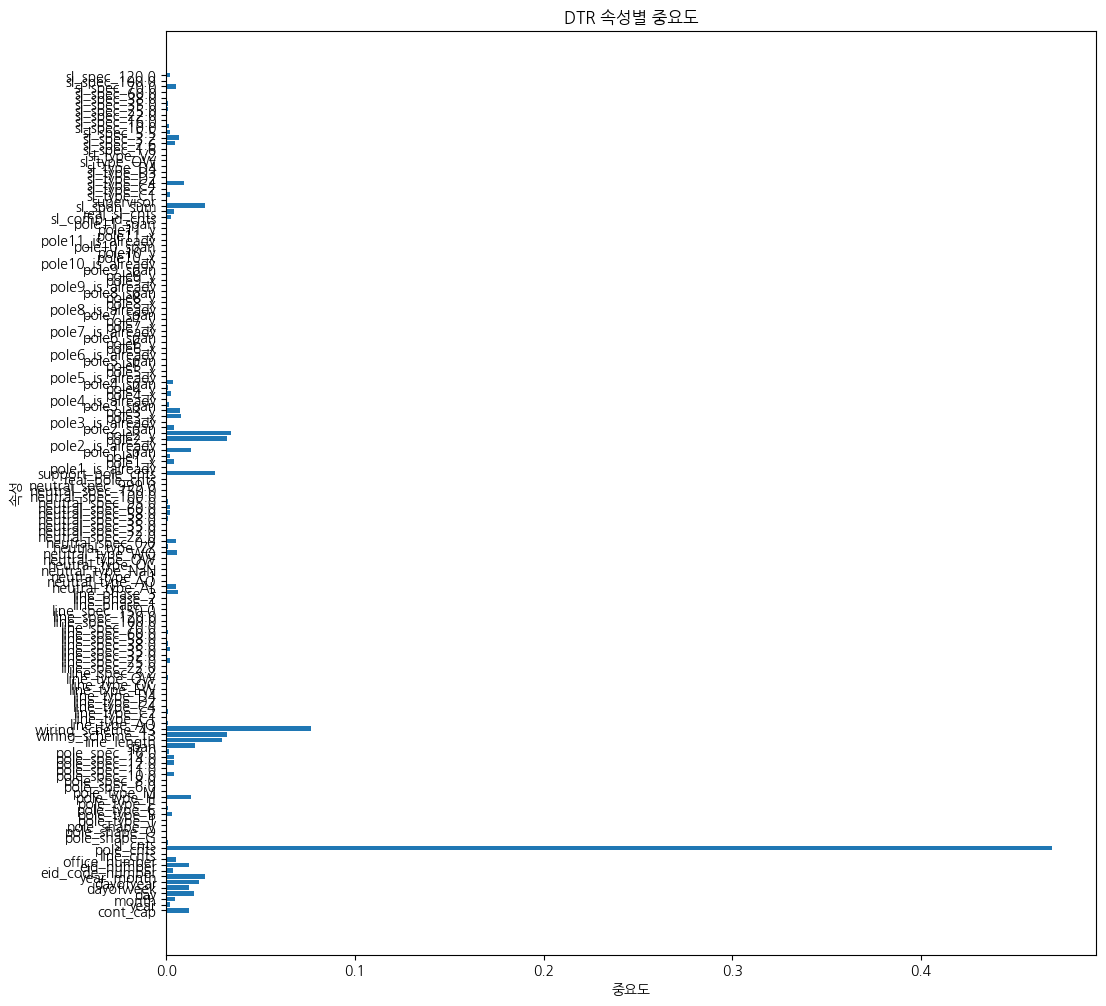

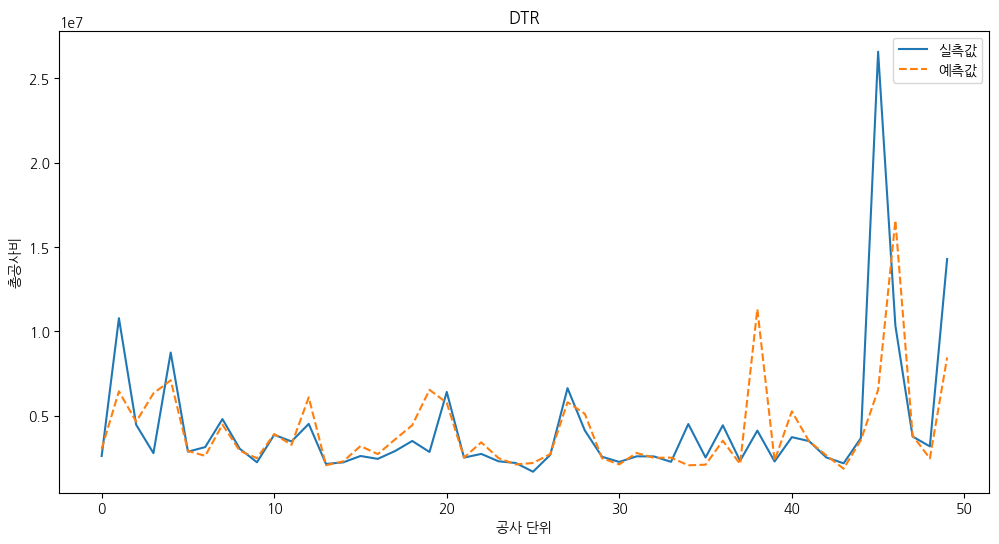

/tmp/ipykernel_7419/3261526636.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Evaluation: RFR
R2_SCORE: 0.638932, MAPE: 17.116635, MSE: 3361289042168.745605, RMSE: 1833381.859343, MAE: 846342.244706


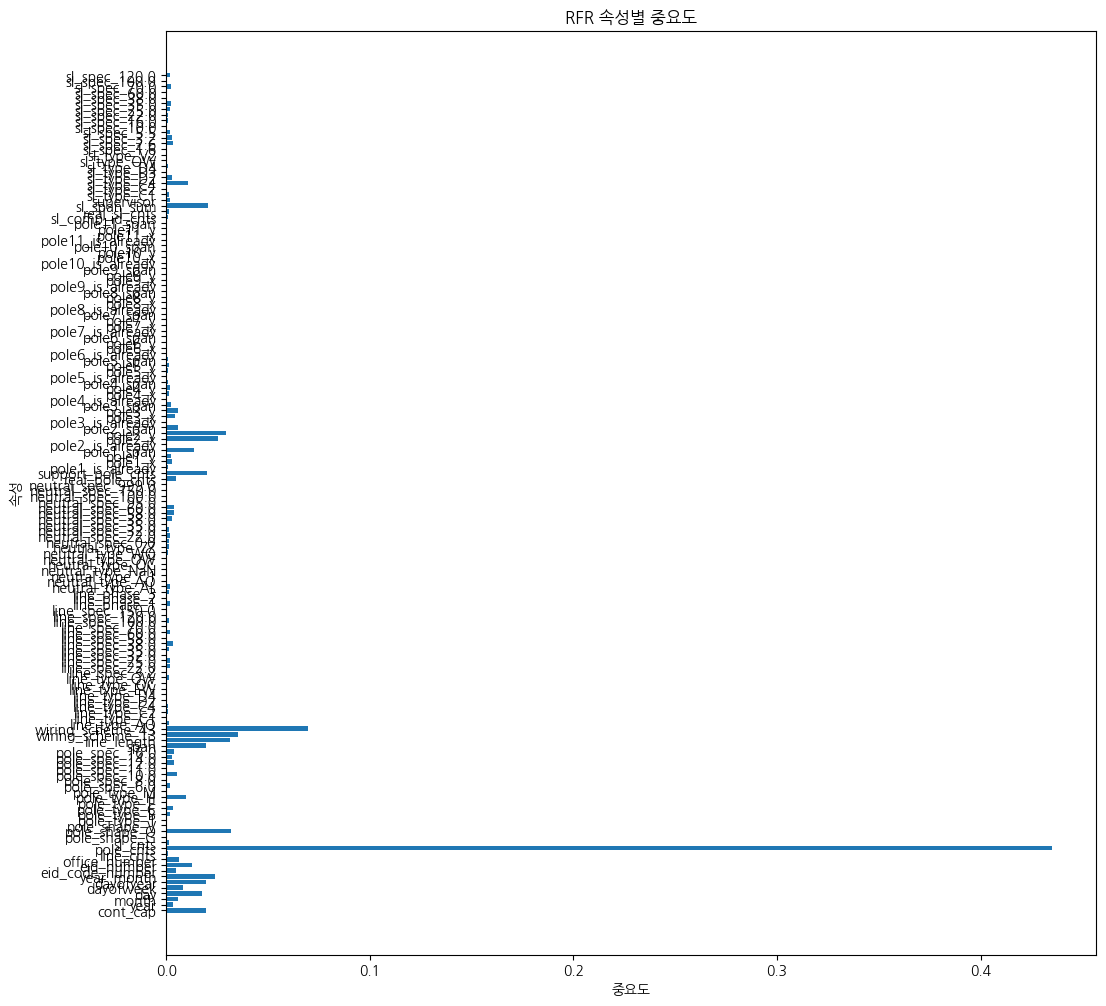

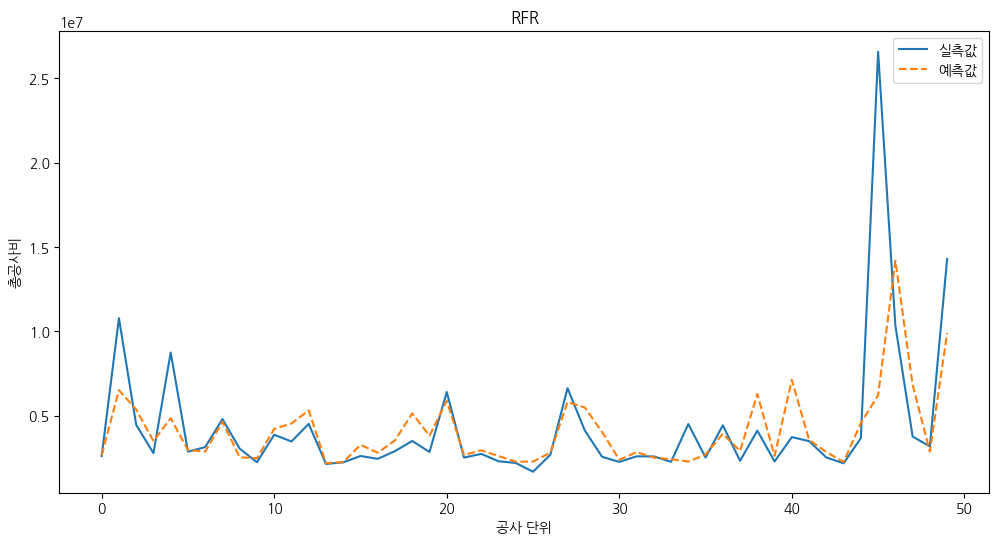

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Evaluation: GBR
R2_SCORE: 0.654058, MAPE: 16.722714, MSE: 3220479596988.458496, RMSE: 1794569.473993, MAE: 821428.302198


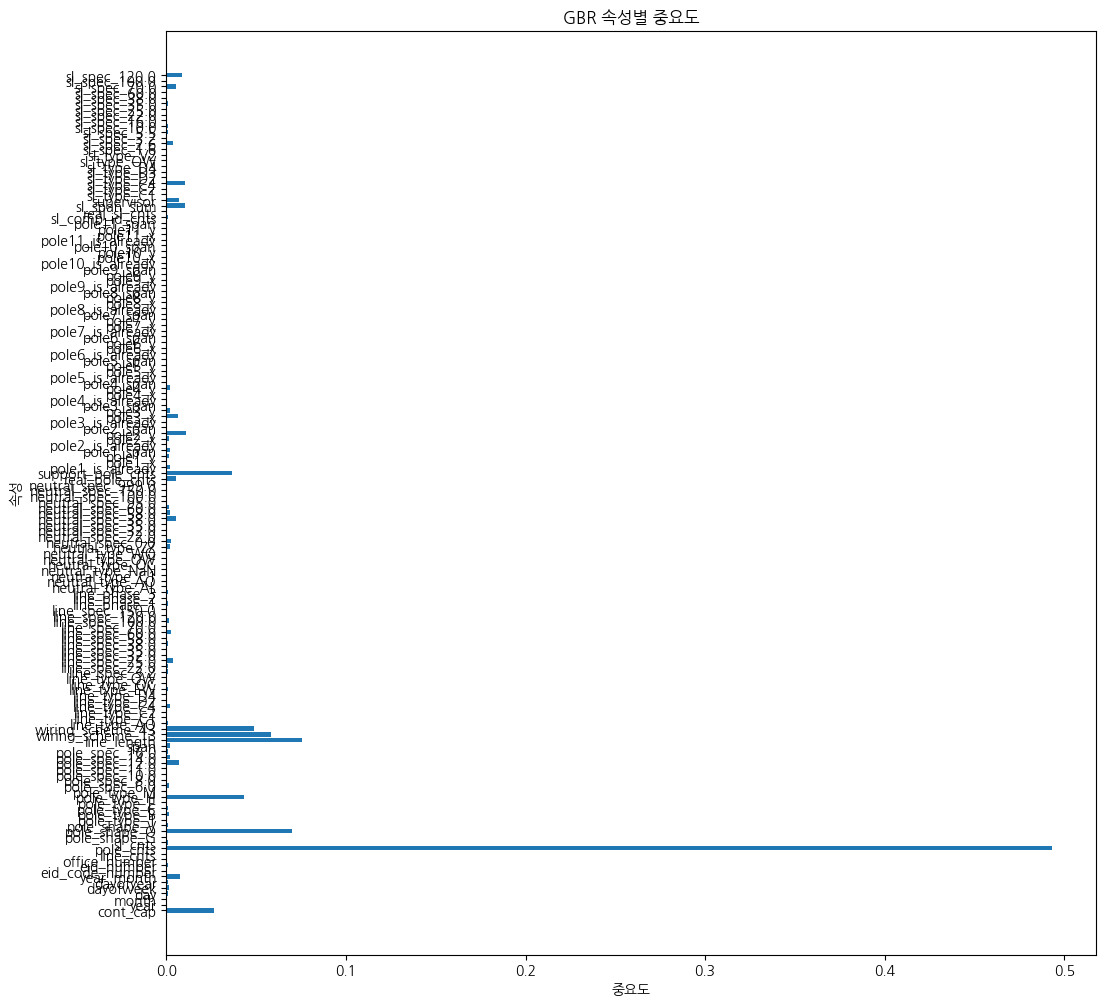

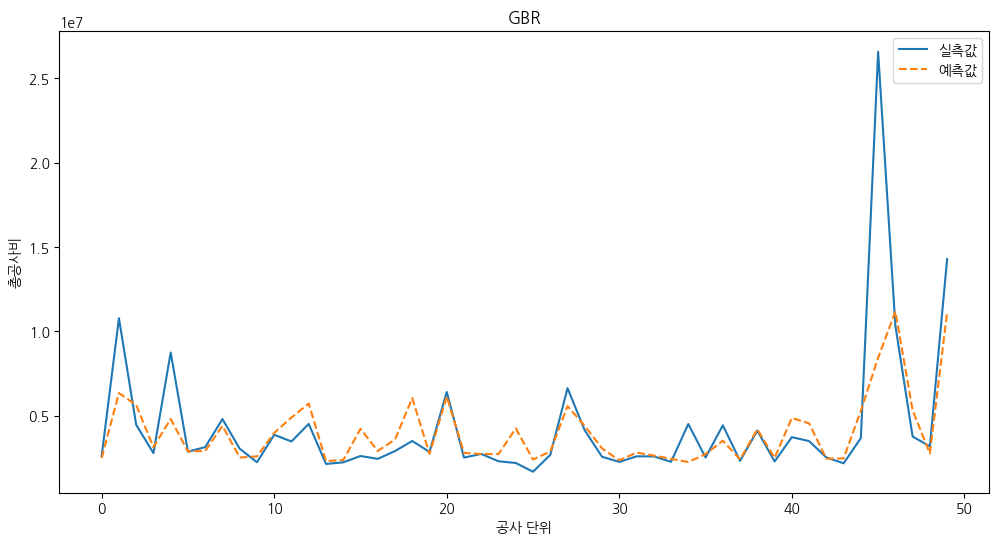

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.341e+16, tolerance: 8.638e+12
  model = cd_fast.enet_coordinate_descent(


Evaluation: EN
R2_SCORE: 0.642362, MAPE: 17.533597, MSE: 3329359202002.888672, RMSE: 1824653.173072, MAE: 840647.382024
`EN` object has no attribute `feature_importances_`


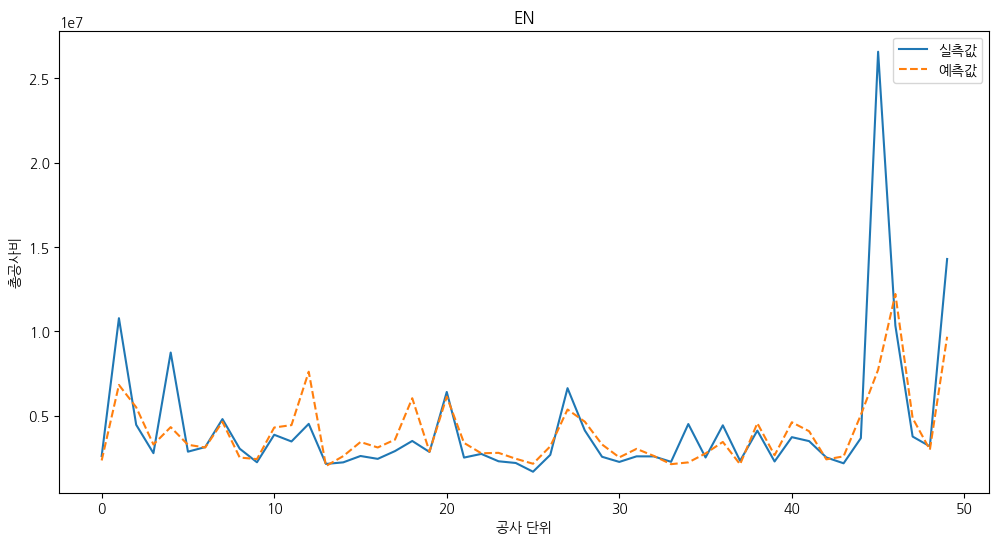

Evaluation: XGR
R2_SCORE: 0.253278, MAPE: 34.028187, MSE: 6951459720180.771484, RMSE: 2636562.102470, MAE: 1656977.637571


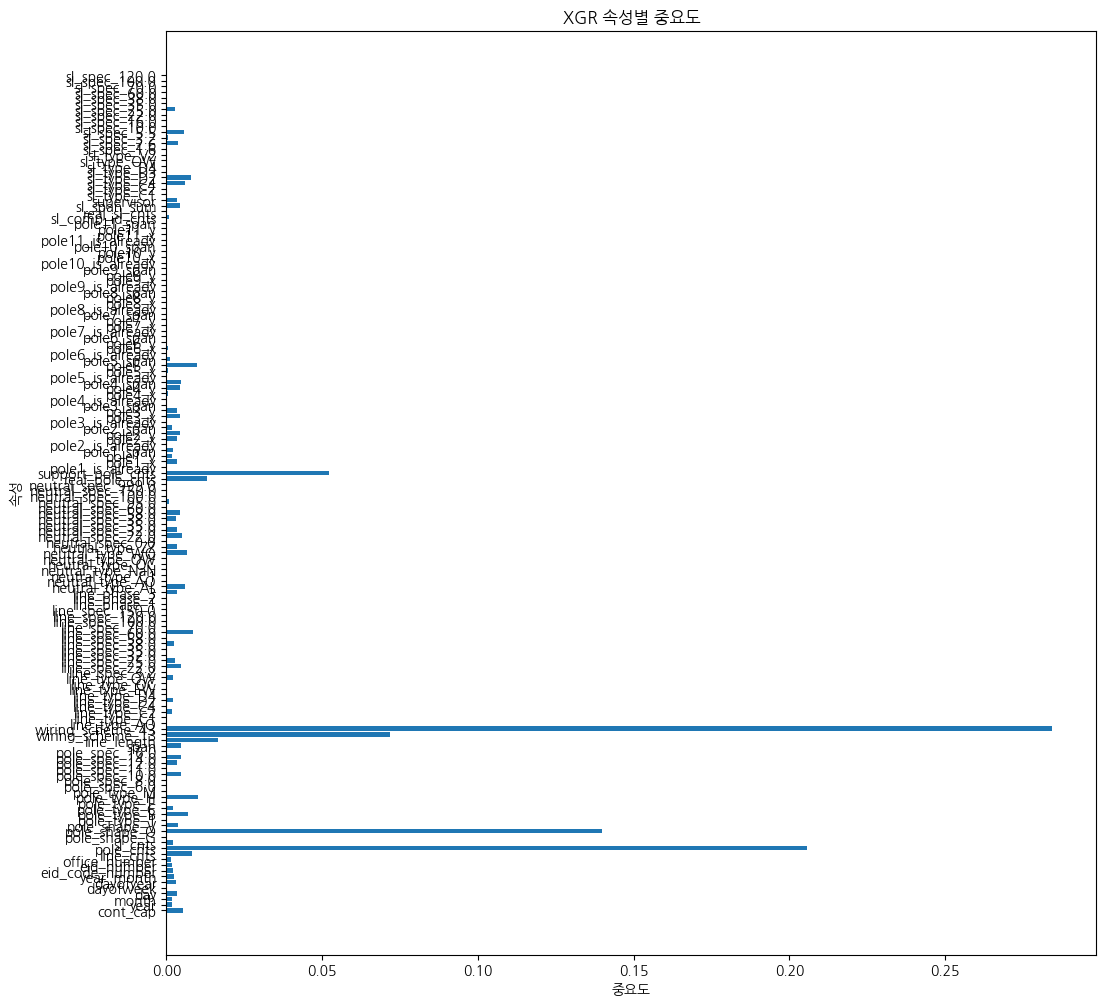

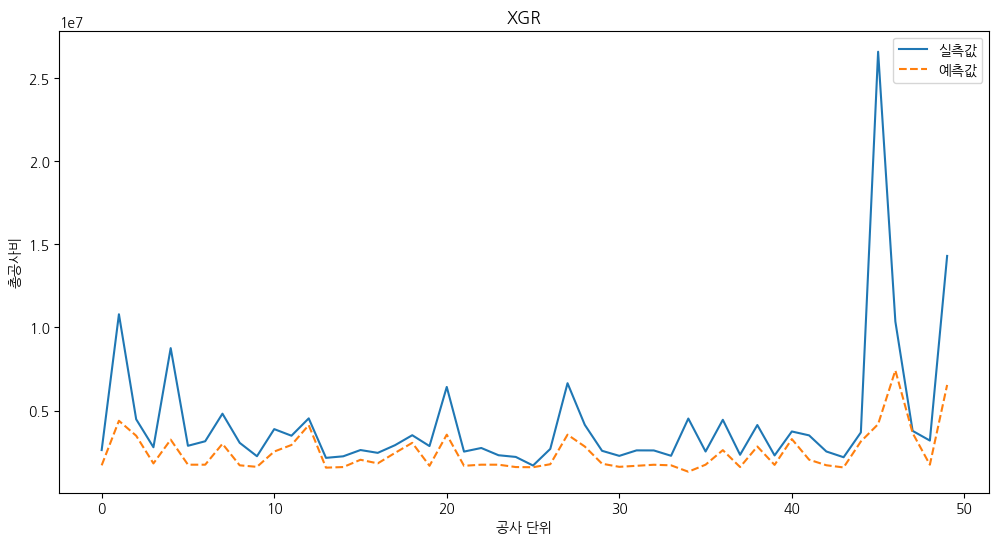

In [7]:
evaluation_values = []
model_names = []
column_names = ['r2score', 'mape', 'mse', 'rmse', 'mae']
for _model_key in ml_models.keys():
    model_fit_and_evaluation(_model_key, display_start=50, display_size=50)
    
df_evaluation = pd.DataFrame(
    evaluation_values, columns=column_names, index=model_names
)

In [8]:
df_evaluation

,r2score,mape,mse,rmse,mae
LIN,-8.705779e+18,3.482462e+07,8.104468e+31,9.002482e+15,2.551839e+14
LASSO,6.247915e-01,1.770849e-01,3.492927e+12,1.868937e+06,8.520204e+05
RIDGE,6.265934e-01,1.764058e-01,3.476152e+12,1.864444e+06,8.497479e+05
KNR,5.501116e-01,1.850240e-01,4.188145e+12,2.046496e+06,9.332897e+05
DTR,2.475180e-01,2.371229e-01,7.005078e+12,2.646711e+06,1.165080e+06
RFR,6.389320e-01,1.711664e-01,3.361289e+12,1.833382e+06,8.463422e+05
GBR,6.540577e-01,1.672271e-01,3.220480e+12,1.794569e+06,8.214283e+05
EN,6.423619e-01,1.753360e-01,3.329359e+12,1.824653e+06,8.406474e+05
XGR,2.532777e-01,3.402819e-01,6.951460e+12,2.636562e+06,1.656978e+06
